# Filtering

가장자리 padding 방법

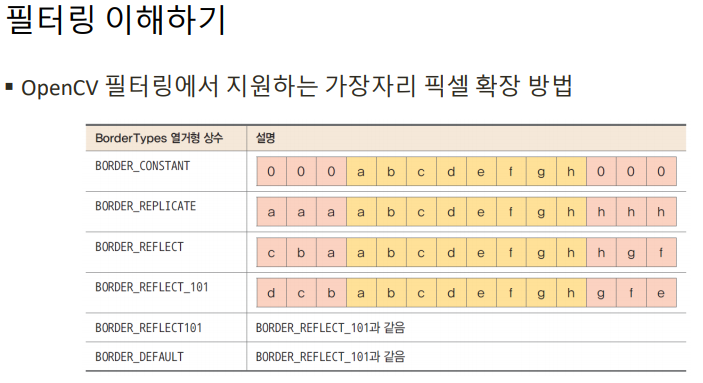

```cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None)```

# Mean filter

In [1]:
import sys
import numpy as np
import cv2

In [2]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [3]:
kernel = np.ones((3, 3), dtype=np.float64) / 9.

#2D Filtering
dst = cv2.filter2D(src, -1, kernel) # -1을 지정하면 src와 같은 타입의 dst 영상을 생성

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [4]:
dst = cv2.blur(src, (3, 3))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


다양한 필터

In [5]:
import sys
import numpy as np
import cv2

In [6]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

In [7]:
for ksize in (3, 5, 7):
    # 필터가 3x3, 5x5, 7x7
    dst = cv2.blur(src, (ksize, ksize))

    desc = 'Mean: {}x{}'.format(ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

# Gaussian Filter

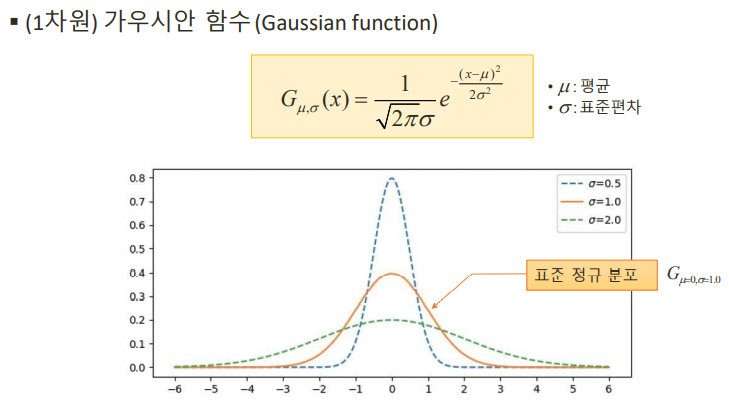

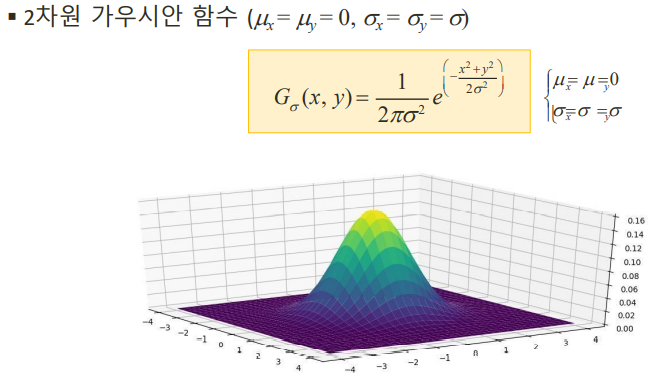

```cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None,
borderType=None)```

**ksize**: 가우시안 커널 크기 (0,0)은 sigma 값에 의해 자동 결정을 의미.

In [8]:
import sys
import numpy as np
import cv2


In [9]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

# 가우시안 # 필터 시그마 값: 3
dst = cv2.GaussianBlur(src, (0, 0), 3)
# 평균 필터 # 필터 크기:7 x 7
dst2 = cv2.blur(src, (7, 7))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()


여러 sigma 값에 따른 결과

In [10]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

In [11]:
for sigma in range(1, 6):
    # sigma 값을 이용하여 가우시안 필터링
    dst = cv2.GaussianBlur(src, (0, 0), sigma)

    desc = 'sigma = {}'.format(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()


# Unsharp mask

sharpening

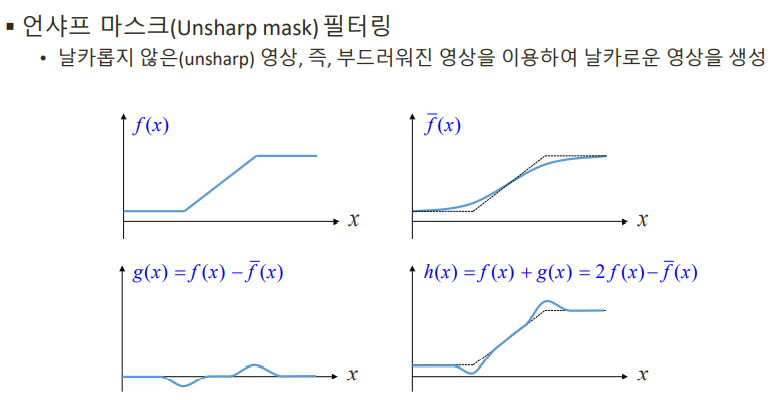

In [12]:
import sys
import numpy as np
import cv2

## Gray Scale unsharp Filter

In [13]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [14]:
# 가우시안 필터 # 시그마 값: 2
blr = cv2.GaussianBlur(src, (0, 0), 2)

# 명암비 조절
dst = np.clip(2.0*src - blr, 0, 255).astype(np.uint8)
# dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

## 컬러 영상에 대한 unsharp filter

컬러 영상 masking이나 filtering할 때 보통 YCrCb를 사용하는 듯 하다.

YCbCr은 영상 시스템에서 사용되는 색공간의 일종이다. Y 는 휘도 성분이며 Cb 와 Cr 은 색차 성분이다. ... YCbCr 은 절대 색공간 이 아니며 RGB 정보를 인코딩하는 방식의 하나로, 실제로 보이는 이미지의 색은 신호를 디스플레이 하기 위해 사용된 원본 RGB 정보에 의존한다. 

\- Wikipedia

In [15]:
src = cv2.imread('rose.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [17]:
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32) # 휘도 성분만 filtering

blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)

# 명암비 조절 => 0 : Y, 1 :  Cr, 2 : Cb => Y : 휘도
src_ycrcb[:, :, 0] = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [18]:
print(src_ycrcb.shape) # => Y => alpha, Cr, Cb
print(src.shape) # => Blue Green Red

(320, 480, 3)
(320, 480, 3)


```
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()
```

# Noise Filter

**1. Median Filter**

```cv2.medianBlur(src, ksize, dst=None)```

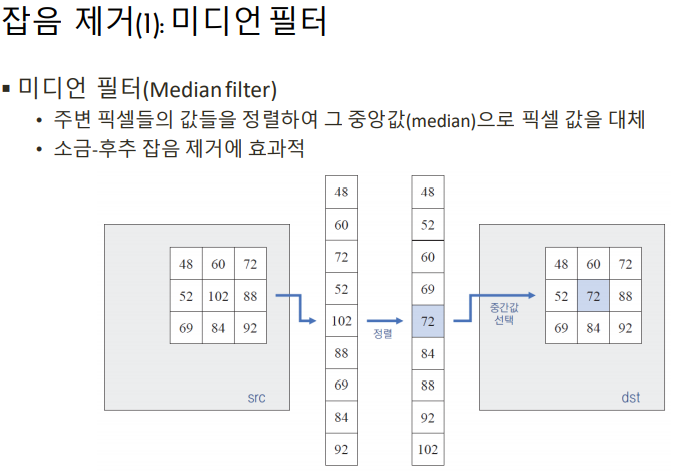

In [19]:
import sys
import numpy as np
import cv2

In [20]:
src = cv2.imread('noise.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [21]:
dst = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

**2. Bilateral Filter**

```cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst=None,
borderType=None)```

▪ 가우시안 잡음 제거에는 가우시안 필터가 효과적

▪ (일반적인) 가우시안 필터링: 영상 전체에서 blurring

**▪ 양방향 필터: 에지가 아닌 부분에서만 blurring**

In [22]:
import sys
import numpy as np
import cv2

In [23]:
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [24]:
dst = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()